In [86]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [87]:
df_lemas = pd.read_excel('~/Git/Academic_Research/Economics_Of_Policing/data/LEMAS_Variables.xlsx', 'Sheet1')
df_defintions = pd.read_excel('~/Git/Academic_Research/Economics_Of_Policing/data/LEMAS_Variables.xlsx', 'Sheet2')
df_priv = pd.read_excel('~/Git/Academic_Research/Economics_Of_Policing/data/Police_Privileges_and_LEMAS.xlsx', 'Sheet1')

In [88]:
relevant_def = list(df_defintions['Variable Name'])
var_select = ['Disqualifies Complaints',
              'Restricts/Delays Interrogations',
              'Gives officers unfair access to info ',
              'Limits oversight/discipline',
              'Requires City to Pay for Misconduct',
              'Erases misconduct records ',
             'TOTALPRIV',
             'State',
             'City']

relevant_var = relevant_def
for variable in var_select:
    relevant_var.append(variable)

relevant_var = sorted(relevant_var)
relevant_var

['BDGT_SRC_ASST',
 'BDGT_SRC_FED',
 'BDGT_SRC_FEE',
 'BDGT_SRC_MNC',
 'BDGT_TTL',
 'BDGT_TTL_EST',
 'COM_COL',
 'COM_MIS',
 'COM_NSARA',
 'COM_PTNR',
 'COM_SARA',
 'COM_SURV',
 'COM_TRN_INSRV',
 'COM_TRN_REC',
 'City',
 'Disqualifies Complaints',
 'Erases misconduct records ',
 'FTCIV',
 'FTSWORN',
 'Gives officers unfair access to info ',
 'HIR_RTR_DB',
 'HIR_RTR_DC',
 'HIR_RTR_OTHR',
 'HIR_RTR_SS',
 'Limits oversight/discipline',
 'PAY_BARG',
 'PAY_FUNC_ADMN',
 'PAY_FUNC_CRT',
 'PAY_FUNC_EMRG',
 'PAY_FUNC_EVNT',
 'PAY_FUNC_INVS',
 'PAY_FUNC_PTRL',
 'PAY_FUNC_SHFT',
 'PAY_INCT_EDU',
 'PAY_INCT_HZRD',
 'PAY_INCT_LANG',
 'PAY_INCT_MRT',
 'PAY_INCT_OTHR',
 'PAY_INCT_RINC',
 'PAY_INCT_SD',
 'PAY_INCT_SPCL',
 'PAY_INCT_SPEC',
 'PAY_INCT_VOC',
 'PAY_LMT',
 'PAY_OUT',
 'PAY_OVER_NSW',
 'PAY_OVER_SW',
 'PAY_RMB_ARMR',
 'PAY_RMB_FIRE',
 'PAY_RMB_SFTY',
 'PAY_RMB_TUIT',
 'PAY_RMB_UNF',
 'PAY_RST_HRS',
 'PAY_RST_NO',
 'PAY_RST_OTHR',
 'PAY_RST_TYPE',
 'PAY_SAL_EXC_MAX',
 'PAY_SAL_EXC_MIN',
 'PAY

In [89]:
df = df_priv[relevant_var]
df.head()

,BDGT_SRC_ASST,BDGT_SRC_FED,BDGT_SRC_FEE,BDGT_SRC_MNC,BDGT_TTL,BDGT_TTL_EST,COM_COL,COM_MIS,COM_NSARA,COM_PTNR,...,PERS_RESP_INVST,PERS_RESP_JAIL,PERS_RESP_OTHR,PERS_RESP_PATRL,PTCIV,PTSWORN,Requires City to Pay for Misconduct,Restricts/Delays Interrogations,State,TOTALPRIV
0,1.0,1.0,1.0,1.0,155098000.0,2.0,1,3,703,1,...,200,0,60,703,15.0,20.0,1,1,NM,5
1,1.0,1.0,2.0,1.0,114943826.0,2.0,1,3,50,1,...,83,0,83,164,106.0,0.0,1,1,CA,4
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,AK,5
3,1.0,1.0,2.0,1.0,82668931.0,2.0,1,3,336,1,...,149,6,125,336,13.0,26.0,0,0,TX,0
4,1.0,1.0,1.0,2.0,168651480.0,2.0,2,3,53,1,...,294,0,414,1232,0.0,0.0,0,0,GA,0


### Each line of red is missing data

There isn't a lot, but where there is, the entire observation seems to be missing except "City"

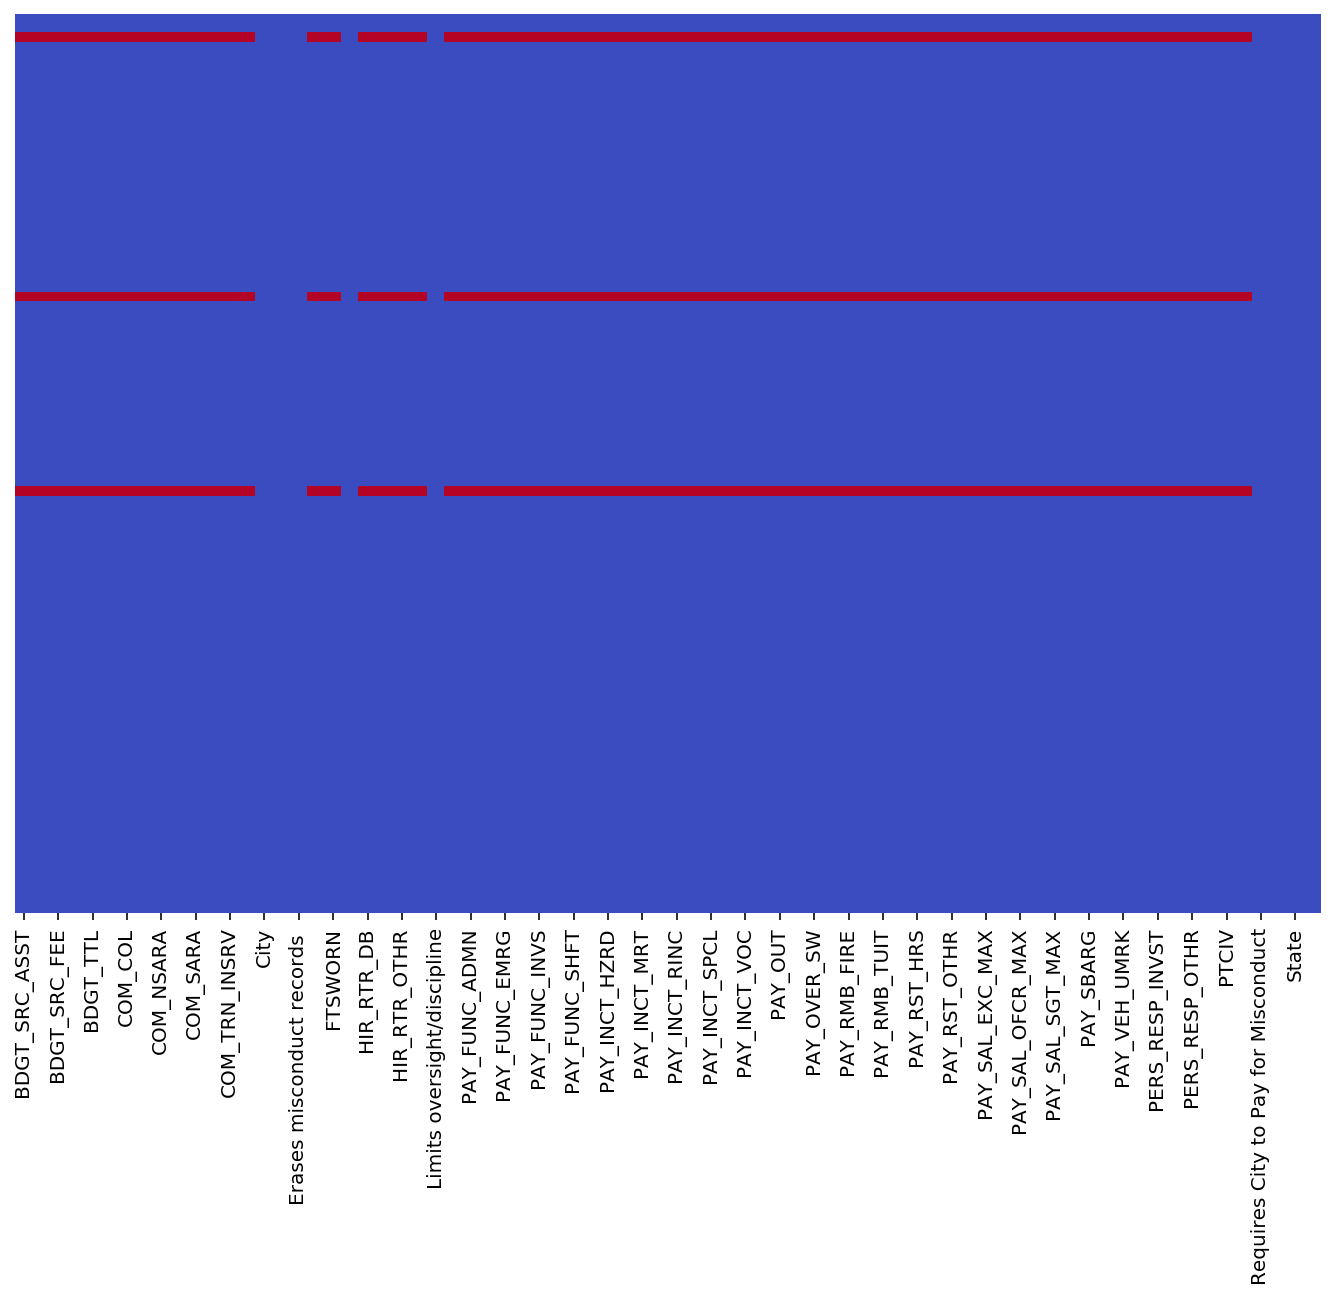

In [90]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.heatmap(df.isnull(), yticklabels= False, cbar=False, cmap = 'coolwarm')
plt.show()

In [91]:
set(df.isna().sum(axis=0))

{0, 3}

In [92]:
mt = df[df['BDGT_SRC_ASST'].isna()]
mt_states = list(set(mt['State']))
mt_cities = list(set(mt['City']))

print("The states: {} are missing all data".format(mt_states))
print("The cities {} are missing all data".format(mt_cities))

The states: ['TX', 'AK', 'WI'] are missing all data
The cities ['Madison', 'Garland', 'Anchorage'] are missing all data


In [93]:
print('The variables in the dataset are:')
print("="*40)
list(df.columns)

The variables in the dataset are:


['BDGT_SRC_ASST',
 'BDGT_SRC_FED',
 'BDGT_SRC_FEE',
 'BDGT_SRC_MNC',
 'BDGT_TTL',
 'BDGT_TTL_EST',
 'COM_COL',
 'COM_MIS',
 'COM_NSARA',
 'COM_PTNR',
 'COM_SARA',
 'COM_SURV',
 'COM_TRN_INSRV',
 'COM_TRN_REC',
 'City',
 'Disqualifies Complaints',
 'Erases misconduct records ',
 'FTCIV',
 'FTSWORN',
 'Gives officers unfair access to info ',
 'HIR_RTR_DB',
 'HIR_RTR_DC',
 'HIR_RTR_OTHR',
 'HIR_RTR_SS',
 'Limits oversight/discipline',
 'PAY_BARG',
 'PAY_FUNC_ADMN',
 'PAY_FUNC_CRT',
 'PAY_FUNC_EMRG',
 'PAY_FUNC_EVNT',
 'PAY_FUNC_INVS',
 'PAY_FUNC_PTRL',
 'PAY_FUNC_SHFT',
 'PAY_INCT_EDU',
 'PAY_INCT_HZRD',
 'PAY_INCT_LANG',
 'PAY_INCT_MRT',
 'PAY_INCT_OTHR',
 'PAY_INCT_RINC',
 'PAY_INCT_SD',
 'PAY_INCT_SPCL',
 'PAY_INCT_SPEC',
 'PAY_INCT_VOC',
 'PAY_LMT',
 'PAY_OUT',
 'PAY_OVER_NSW',
 'PAY_OVER_SW',
 'PAY_RMB_ARMR',
 'PAY_RMB_FIRE',
 'PAY_RMB_SFTY',
 'PAY_RMB_TUIT',
 'PAY_RMB_UNF',
 'PAY_RST_HRS',
 'PAY_RST_NO',
 'PAY_RST_OTHR',
 'PAY_RST_TYPE',
 'PAY_SAL_EXC_MAX',
 'PAY_SAL_EXC_MIN',
 'PAY

In [94]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

/Users/daiglechris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


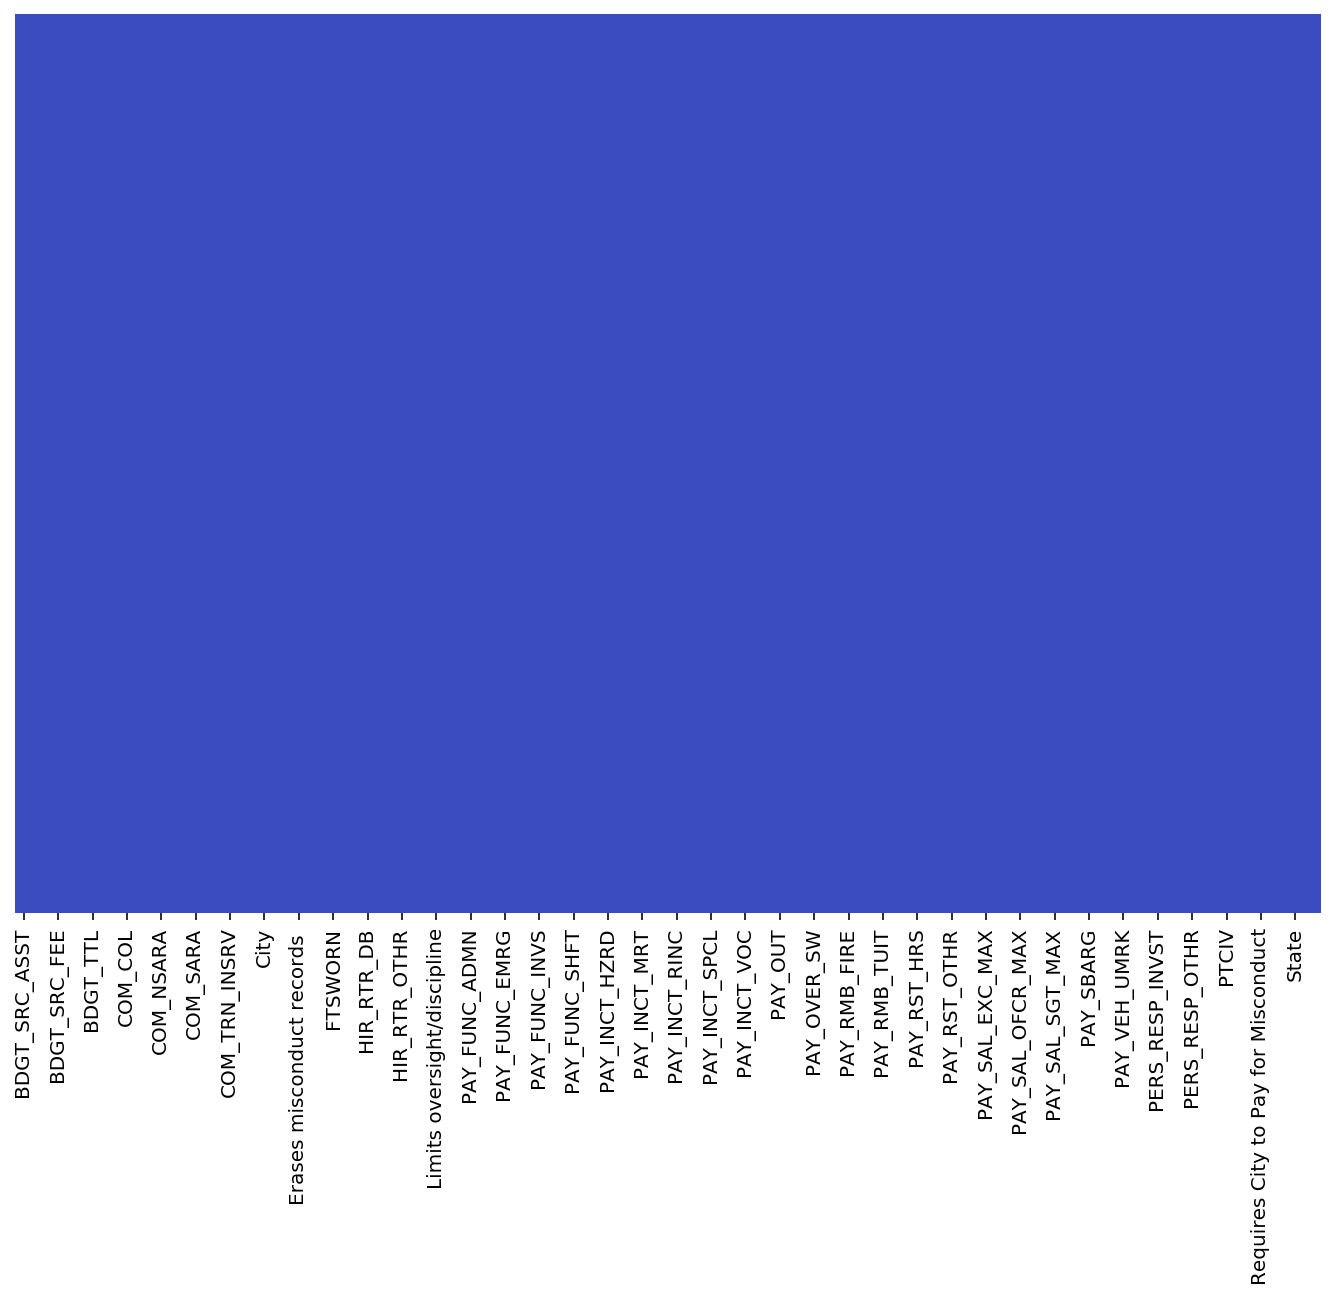

In [95]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.heatmap(df.isnull(), yticklabels= False, cbar=False, cmap = 'coolwarm')
plt.show()

In [83]:
### No more missing data